In [1]:
# task 2 - Neural network

In [2]:
%%bash
# pip3 install tensorflow # please uncomment for first time
# pip3 install keras

In [3]:
# Import the needed packages
import tensorflow as tf
import matplotlib.pyplot as plt

# For CNN layers and model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# dont show warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [4]:
# declare glabal variables
(x_train, y_train, x_test, y_test) = [0 ,0 ,0 , 0]
model = False

In [5]:
def load_data() :
    # Get mnist data set and split to train and test
    global x_train, y_train, x_test, y_test
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
def pre_process_data() :
    # Reshape the datasets from 3 dim to 4 dim - required
    global x_train, y_train, x_test, y_test

    #x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    #x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [7]:
def normalize_data() :
    # Convert to float
    global x_train, y_train, x_test, y_test

    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255


In [8]:
def create_model():
    # Create model
    global model
    model = Sequential() 
    model.add(Dense(784, activation=tf.nn.relu, input_shape=(28 * 28,)   ))
    model.add(Dense(784, activation=tf.nn.relu, input_shape=(28 * 28,)   ))

    #model.add(Dense(1,activation=tf.nn.softmax))

In [9]:
def train_model() :
    # Compile and train the model
    global x_train, y_train, x_test, y_test, model
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x=x_train.reshape((60000, 28 * 28)), y=y_train, epochs=10, batch_size=128 )

In [10]:
def evaluate_model() :
    # Evaluate the model
    global x_train, y_train, x_test, y_test, model

    model.evaluate(x_test.reshape((10000, 28 * 28)), y_test)

In [16]:

def predict_image(image_index) :
    # Predict image 
    global x_train, y_train, x_test, y_test, model

    
    # Validate index must be < 10 000
    if image_index > 10000 :
        image_index = 25
    image = x_test[image_index]
    print(image.shape)

    plt.imshow(image.reshape(28, 28),cmap='Greys')
    pred = model.predict(image.reshape(1, 784))
    print('The predected image is : ' , pred.argmax())

    # printimage.reshape(28, 28))
    


In [12]:
# RUN 

# 1 - Load Data
load_data()

# 2 - preprocess data
pre_process_data()

# 3 - normalize data
normalize_data()

# 4 - create model
create_model()






In [13]:
# 5 - train model with x_train, y_train
train_model()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 5.2044 - accuracy: 0.2129
Epoch 2/10
60000/60000 [==============================] - 17s 275us/step - loss: 6.6315 - accuracy: 0.1070
Epoch 3/10
60000/60000 [==============================] - 16s 267us/step - loss: 6.6045 - accuracy: 0.1080
Epoch 4/10
60000/60000 [==============================] - 15s 255us/step - loss: 6.6136 - accuracy: 0.1065
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 6.6113 - accuracy: 0.1111
Epoch 6/10
60000/60000 [==============================] - 10s 161us/step - loss: 6.6302 - accuracy: 0.1039
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 6.6298 - accuracy: 0.1064
Epoch 8/10
60000/60000 [==============================] - 12s 196us/step - loss: 6.5841 - accuracy: 0.1110
Epoch 9/10
60000/60000 [=========================

In [14]:
# 6 - evaluate model
evaluate_model()

10000/10000 [==============================] - 2s 204us/step


(28, 28)
The predected image is :  0


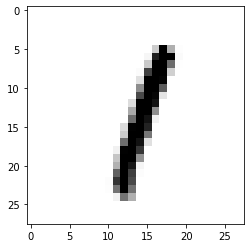

In [17]:
# 7 - predict an image by index ( < 10 000)
predict_image(5) # specify image index in x_test